1.     Write a Python code that will query the DCA.db database file (provided on Github) and create a plot of both historical rate and cumulative production for each of the wells in the DCA_Solved folder. The rate should be on the primary y-axis, while the cumulative production should be on the secondary y-axis. Do not create a new DCA.db

2.     Write a Python code that will query the database and create a stacked plot of historical field gas production rate. Each gas well’s contribution should be shown in the stacked plot.

3.     Write a Python code that will query the database and create a stacked plot of historical field oil production rate. Each oil well’s contribution should be shown in the stacked plot.

4.     Write a Python code that will query the database and create a stacked bar plot of historical field cumulative gas production for the first 6 months. Each gas well’s contribution should be shown in the stacked bar graph.

5.     Write a Python code that will query the database and create a stacked bar plot of historical field cumulative oil production for the first 6 months. Each oil well’s contribution should be shown in the stacked bar graph.

6.     Load the well log data for wells 15_9-F-4, 15_9-F-1B and 15_9-F-14. Plot the following well logs against depth for each of the three wells, using a well log track for each variable:

a.     bulk density (rhob) log

b.     DT (interval transit time for P-wave or inverse of primary wave velocity) log

c.     DTS (interval transit time for S-wave or inverse of shear wave velocity) log

d.     GR (Gamma Ray) log

e.     NPHI (neutron porosity) log

f.      Caliper (CALI) log

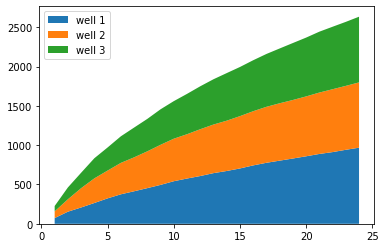

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import pandas as pd
import sqlite3

#create a database named "DCA.db" in the folder where this code is located
conn = sqlite3.connect("DCA.db")  #It will only connect to the DB if it already exists

#create data table to store summary info about each case/well
cur = conn.cursor()

wellID = 1
df1 = pd.read_sql_query(f"SELECT time,rate, Cum,Cum_model FROM Rates WHERE wellID={wellID};", conn)
wellID = 2
df2 = pd.read_sql_query("SELECT time,rate, Cum,Cum_model FROM Rates WHERE wellID={};".format(wellID), conn)
wellID = 3
df3 = pd.read_sql_query(f"SELECT time,rate, Cum,Cum_model FROM Rates WHERE wellID={wellID};", conn) 

labels = ["well 1", "well 2", "well 3"]
fig, ax = plt.subplots()
ax.stackplot(df1['time'], df1['Cum']/1000, df2['Cum']/1000, df3['Cum']/1000, labels=labels)
ax.legend(loc='upper left')
plt.show()
